# Mango Leaf Disease 

## About
### Discription

Type of dat a: 240x320 mango leaf images\*

.
Data form at: JP

G.
Number of ima ges: 4000 images. Of these, around 1800 are of distinct leaves, and the r st
are prepared by zooming and rotating where deemed necess

ary.
Diseases consi dered: Seven diseases, namely Anthracnose, Bacterial Canker, Cutting Wevil,
Die Back, Gall Midge, Powdery Mildew, and Sooty 

Mould.
Number of  classes: Eight (including the healthy cat

egory).
Distribution of instances: Each of the eight categories contains 500

 images.
How data are acquired: Captured from mango trees through the mobile phon

e camera.
Data source  locations: Four mango orchards of Bangladesh, namely Sher-e-Bangla Agricultural
University orchard, Jahangir Nagar University orchard, Uday,ur village
mango orchard, and Itakhola village ma
go orchard.

Where applicable: Suitable for distinguishing healthy and diseases leaves (two-class
prediction) as well as for differentiatin  among various dseases (multi-
clsability
10.00

License


In [1]:
# Importing
import pathlib
import time
import itertools
import os
import shutil

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, DenseNet121

import warnings
warnings.filterwarnings("ignore")

print ('Done')

Done


In [2]:
# import kagglehub

# Download latest version
# path = kagglehub.dataset_download("aryashah2k/mango-leaf-disease-dataset")

# print("Path to dataset files:", path)

### Creating Data Paths

In [ ]:
data_dir = 'archive'
filepaths = []
labels = []

In [4]:
folds = os.listdir(data_dir)

In [5]:
os.path.join(data_dir, 'Anthracnose')

'archive\\Anthracnose'

In [6]:
os.listdir('archive\Anthracnose')

['20211008_124249 (Custom).jpg',
 '20211008_124250 (Custom).jpg',
 '20211008_124252 (Custom).jpg',
 '20211008_124253 (Custom).jpg',
 '20211008_124256 (Custom).jpg',
 '20211008_124301 (Custom).jpg',
 '20211008_124302 (Custom).jpg',
 '20211008_124305 (Custom).jpg',
 '20211008_124306 (Custom).jpg',
 '20211008_124310 (Custom).jpg',
 '20211008_124312 (Custom).jpg',
 '20211008_124334 (Custom).jpg',
 '20211008_124336 (Custom).jpg',
 '20211008_124341 (Custom).jpg',
 '20211008_124345 (Custom).jpg',
 '20211008_124457 (Custom).jpg',
 '20211008_124501 (Custom).jpg',
 '20211008_124522 (Custom).jpg',
 '20211008_124524 (Custom).jpg',
 '20211008_124624 (Custom).jpg',
 '20211008_124632 (Custom).jpg',
 '20211008_124907 (Custom).jpg',
 '20211008_124917 (Custom).jpg',
 '20211008_124931 (Custom).jpg',
 '20211008_124933 (Custom).jpg',
 '20211008_125014 (Custom).jpg',
 '20211008_125016 (Custom).jpg',
 '20211008_125052 (Custom).jpg',
 '20211008_125056 (Custom).jpg',
 '20211008_125100 (Custom).jpg',
 '20211008

In [7]:
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

In [8]:
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
data = pd.concat([Fseries, Lseries], axis= 1)

In [9]:
data.head()

,filepaths,labels
0,archive\Anthracnose\20211008_124249 (Custom).jpg,Anthracnose
1,archive\Anthracnose\20211008_124250 (Custom).jpg,Anthracnose
2,archive\Anthracnose\20211008_124252 (Custom).jpg,Anthracnose
3,archive\Anthracnose\20211008_124253 (Custom).jpg,Anthracnose
4,archive\Anthracnose\20211008_124256 (Custom).jpg,Anthracnose


### Preprocessing

In [10]:
train_data, dummy_data = train_test_split(data,  test_size= 0.2, shuffle= True, random_state= 123)

valid_data, test_data = train_test_split(dummy_data,  test_size= 0.4, shuffle= True, random_state= 123)

In [11]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

In [12]:
test_len = len(test_data)
test_batch_size = max(sorted([test_len // n for n in range(1, test_len + 1) if test_len%n ==0 and test_len/n <= 80]))
test_steps = test_len // test_batch_size

In [ ]:
test_batch_size

80

In [14]:
test_steps

4

In [15]:
def scalar(img):
    return img

In [16]:
tr_gen = ImageDataGenerator(preprocessing_function = scalar)
ts_gen = ImageDataGenerator(preprocessing_function = scalar)

In [17]:
train_gen = tr_gen.flow_from_dataframe(
    train_data,
    x_col = 'filepaths',
    y_col = 'labels',
    target_size = img_size,
    class_mode = 'categorical',
    color_model = 'rgb',
    shuffle = True,
    batch_size = batch_size
)

valid_gen = ts_gen.flow_from_dataframe(
    valid_data,
    x_col = 'filepaths',
    y_col = 'labels',
    target_size = img_size,
    class_mode = 'categorical',
    color_model = 'rgb',
    shuffle = True,
    batch_size = batch_size
)

test_gen = ts_gen.flow_from_dataframe(
    test_data,
    x_col = 'filepaths',
    y_col = 'labels',
    target_size = img_size,
    class_mode = 'categorical',
    shuffle = True,
    batch_size = batch_size
)

Found 3200 validated image filenames belonging to 8 classes.
Found 480 validated image filenames belonging to 8 classes.
Found 320 validated image filenames belonging to 8 classes.


In [18]:
next(train_gen)

(array([[[[221., 223., 220.],
          [222., 224., 221.],
          [223., 225., 222.],
          ...,
          [244., 246., 245.],
          [242., 244., 243.],
          [241., 243., 242.]],
 
         [[220., 222., 219.],
          [223., 225., 222.],
          [225., 227., 224.],
          ...,
          [245., 247., 246.],
          [243., 245., 244.],
          [242., 244., 243.]],
 
         [[221., 223., 220.],
          [225., 227., 224.],
          [227., 229., 226.],
          ...,
          [244., 246., 245.],
          [243., 245., 244.],
          [241., 243., 242.]],
 
         ...,
 
         [[152., 154., 132.],
          [158., 160., 138.],
          [161., 163., 141.],
          ...,
          [194., 195., 187.],
          [194., 195., 187.],
          [193., 194., 186.]],
 
         [[149., 151., 129.],
          [153., 155., 133.],
          [157., 159., 137.],
          ...,
          [194., 195., 187.],
          [192., 193., 185.],
          [191., 192., 184.

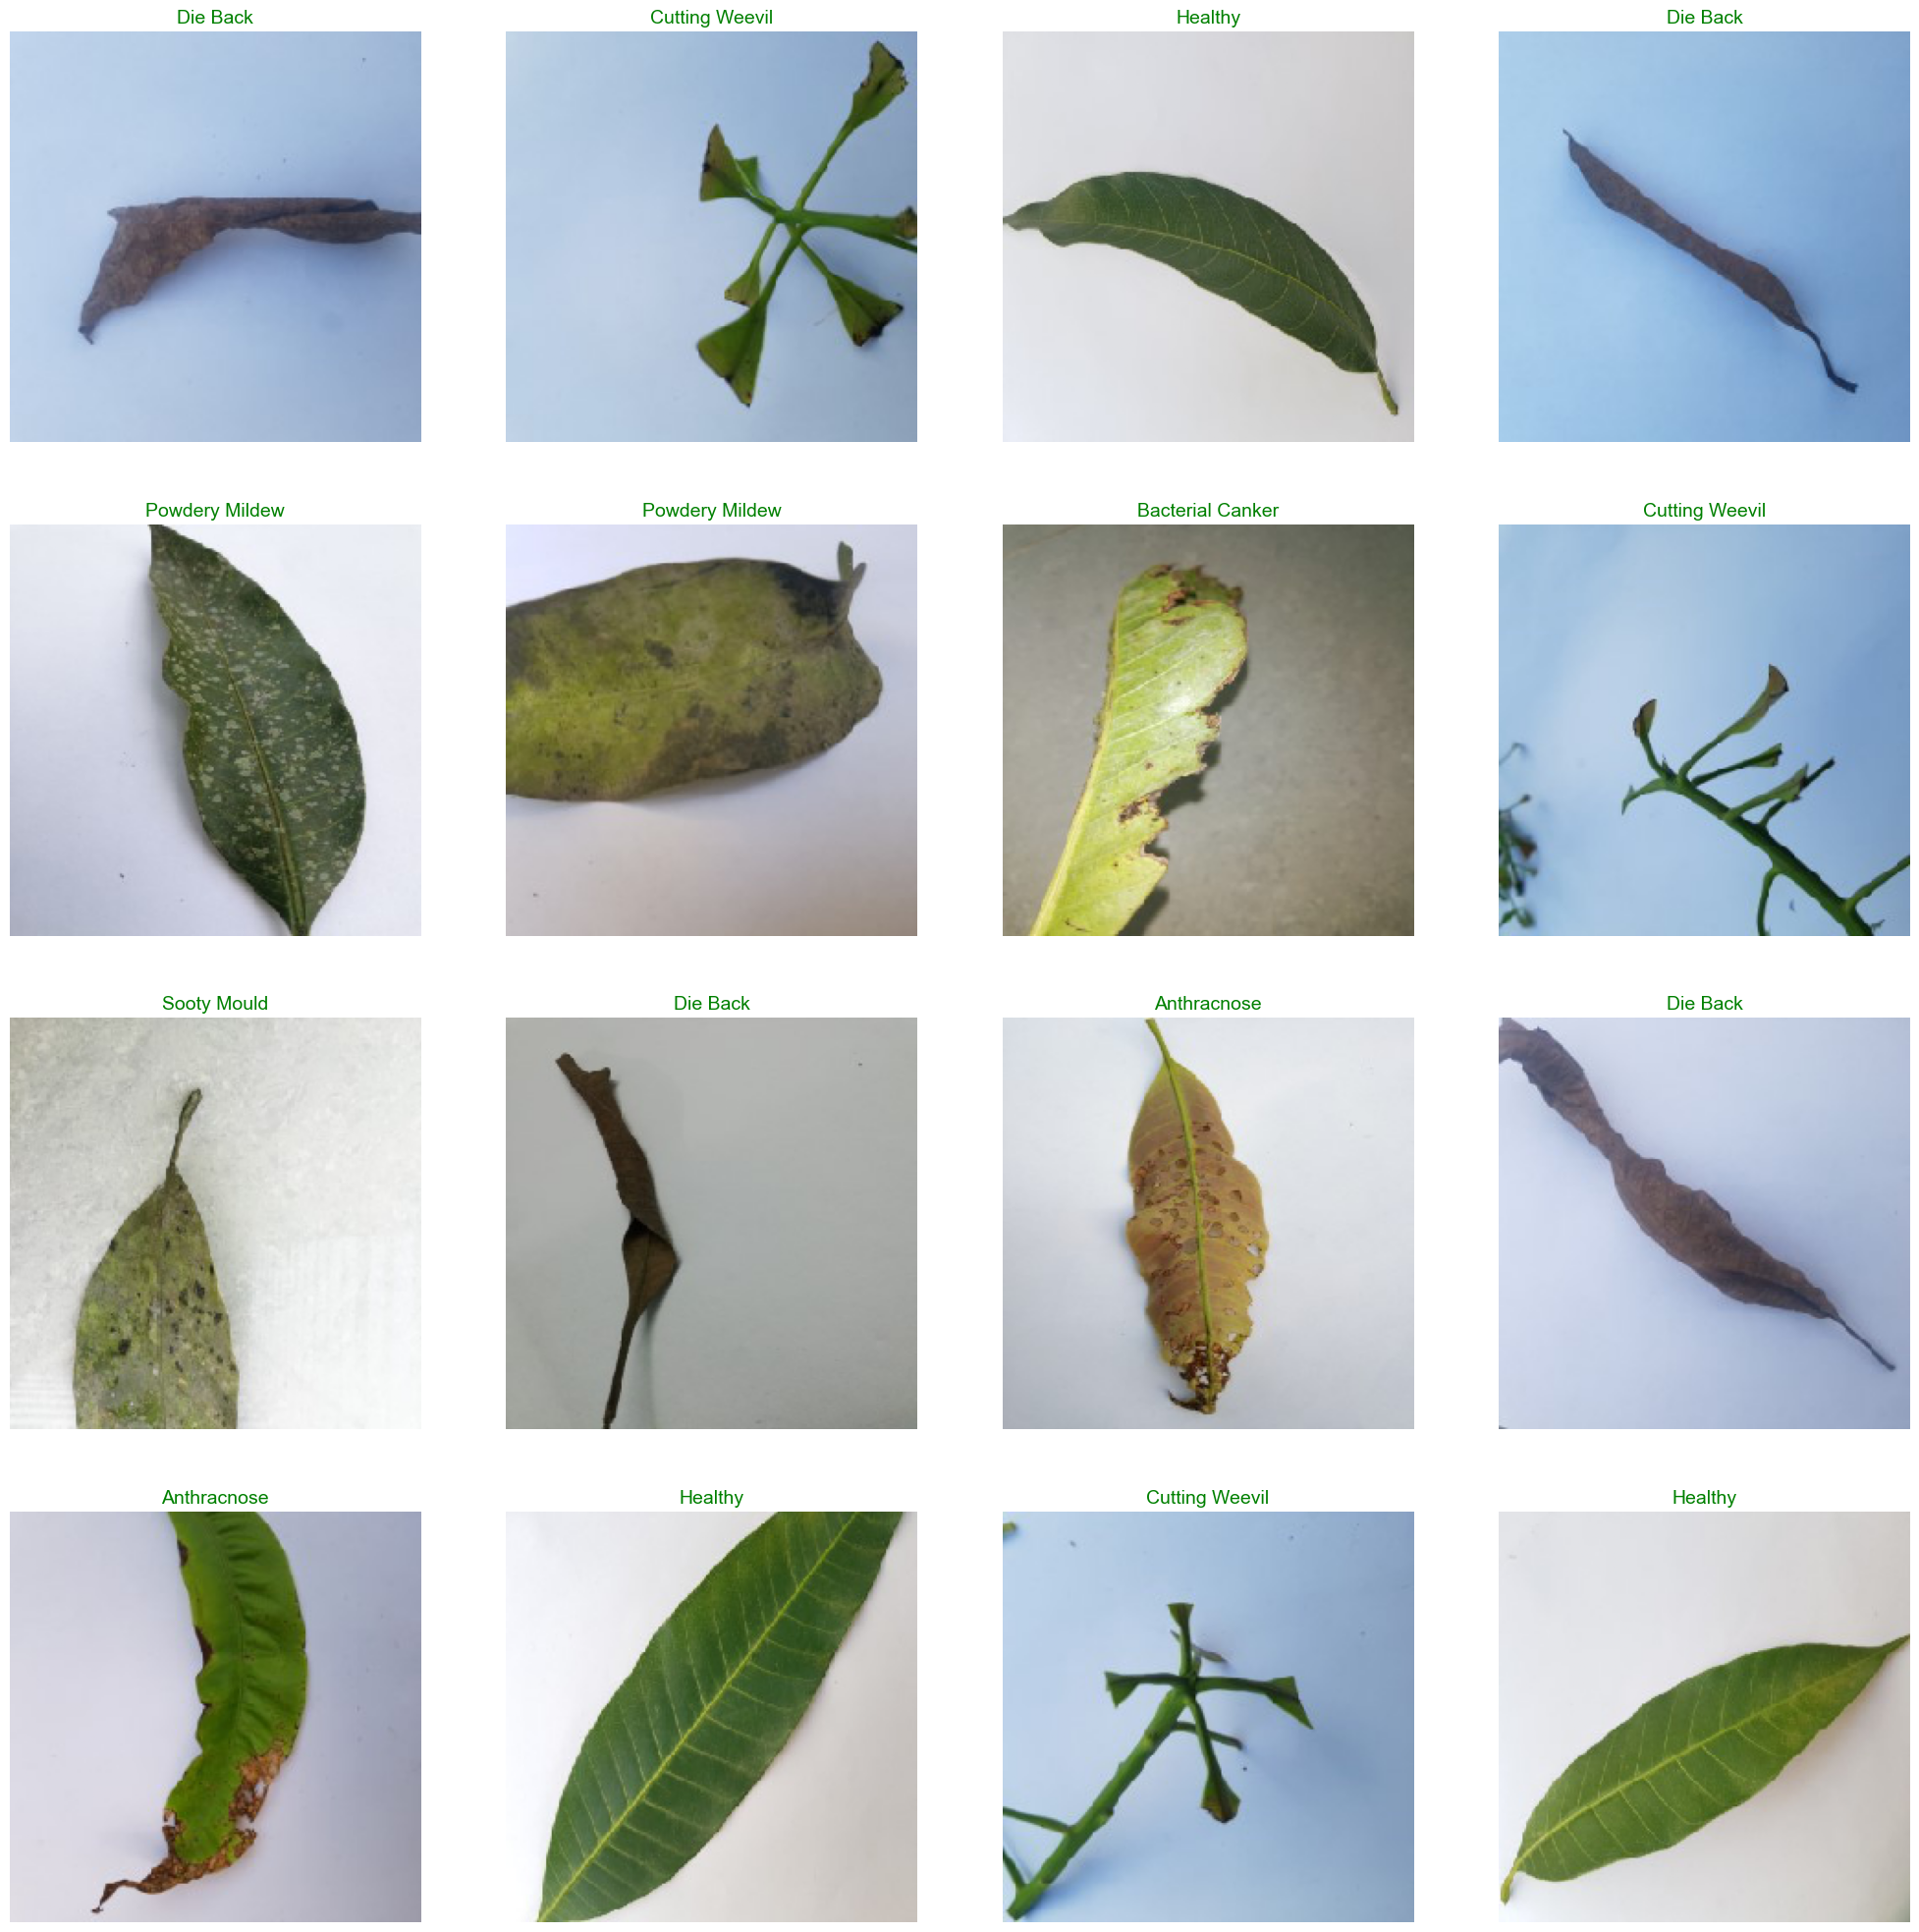

In [19]:
class_index_map = train_gen.class_indices
classes = list(class_index_map.keys())
batch_image, batch_label = next(train_gen)

plt.figure(figsize = (25,25))

for i in range(16):
    plt.subplot(4, 4,i+1)
    image = batch_image[i]/255
    plt.imshow(image)
    index = np.argmax(batch_label[i])
    class_name = classes[index]
    plt.title(class_name, color = 'green', fontsize = 14)
    plt.axis('off')



## Modeling

In [22]:
# Function to build models using popular CNN architectures
def build_model(model_name):
    if model_name == 'VGG16':
        base_model = VGG16(include_top = False, input_shape = img_shape)
    elif model_name == 'VGG19':
        base_model = VGG19(include_top = False, input_shape = img_shape)
    elif model_name == 'ResNet50':
        base_model = ResNet50(include_top = False, input_shape = img_shape)
    elif model_name == 'DenseNet121':
        base_model = DenseNet121(include_top = False,input_shape = img_shape)
    else:
        base_model = Sequential([
            Conv2D(96, (11, 11), strides = 4, activation = 'relu', input_shape = img_shape),
            MaxPooling2D(pool_size = (3, 3), strides = 2),
            Conv2D(256, (5, 5), padding = 'same', activation = 'relu'),
            MaxPooling2D(pool_size = (3, 3), strides = 2),
            Conv2D(384, (3, 3), padding = 'same', activation = 'relu'),
            Conv2D(384, (3, 3), padding = 'same', activation = 'relu'),
            Conv2D(256, (3, 3), padding = 'same', activation = 'relu'),
            MaxPooling2D(pool_size = (3, 3), strides = 2),
            Flatten(),
            Dense(4096, activation = 'relu'),
            Dropout(0.5),
            Dense(4096, activation = 'relu'),
            Dropout(0.5),
            Dense(len(classes), activation = 'softmax')
        ])
    
    model = Sequential([base_model,
                        GlobalAveragePooling2D(),
                        Dense(1024, activation = 'relu'),
                        Dense(len(classes), activation = 'softmax')
                       ])
    return model

Training VGG16 model...
Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - accuracy: 0.6837 - loss: 0.9580 - val_accuracy: 0.9583 - val_loss: 0.1855
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.9568 - loss: 0.1213 - val_accuracy: 0.8979 - val_loss: 0.3735
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 501s 3s/step - accuracy: 0.9334 - loss: 0.2343 - val_accuracy: 0.9979 - val_loss: 0.0043
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 538s 3s/step - accuracy: 0.9693 - loss: 0.1074 - val_accuracy: 0.9812 - val_loss: 0.0772
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 508s 3s/step - accuracy: 0.9973 - loss: 0.0100 - val_accuracy: 0.9958 - val_loss: 0.0078
VGG16 model weights saved.


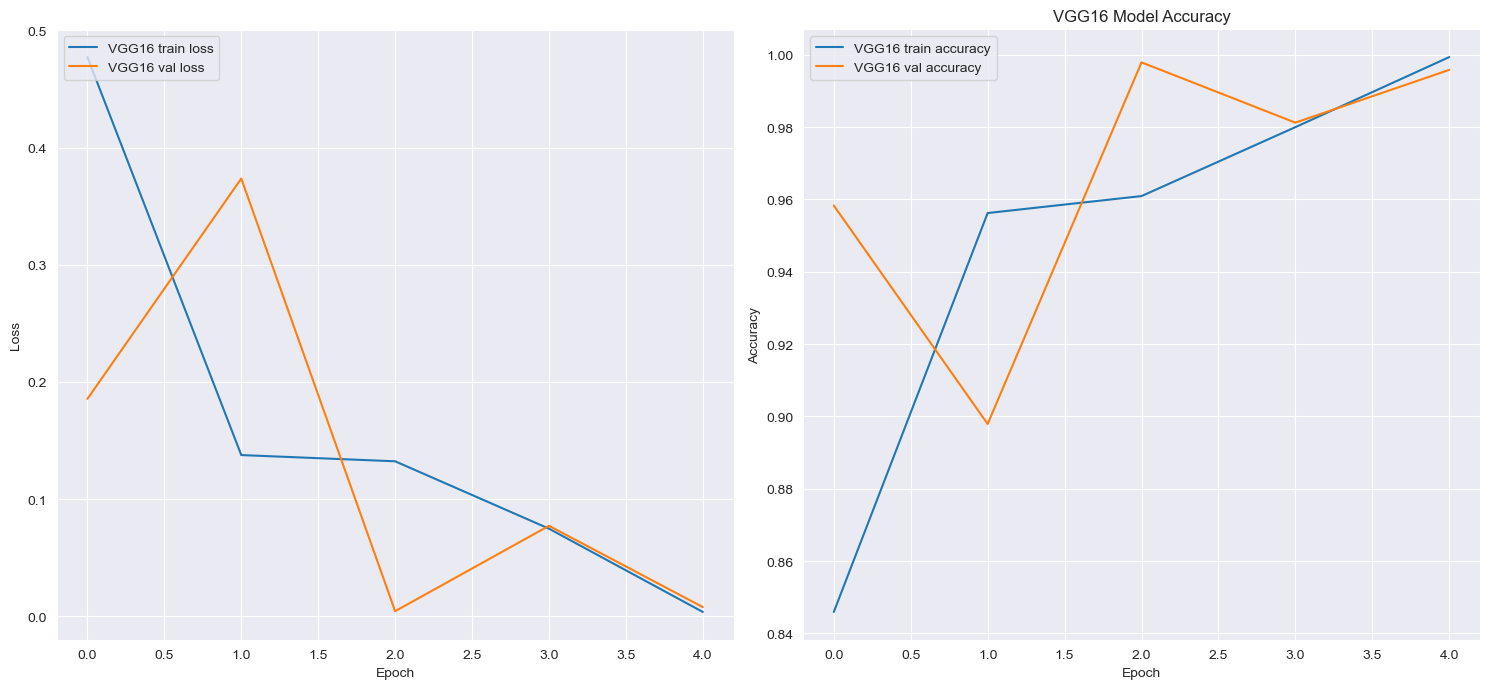

Training VGG19 model...
Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 626s 3s/step - accuracy: 0.3945 - loss: 1.6102 - val_accuracy: 0.8417 - val_loss: 0.5102
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 608s 3s/step - accuracy: 0.8739 - loss: 0.3584 - val_accuracy: 0.9146 - val_loss: 0.1928
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 604s 3s/step - accuracy: 0.9450 - loss: 0.1755 - val_accuracy: 0.9812 - val_loss: 0.0525
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 601s 3s/step - accuracy: 0.9651 - loss: 0.1111 - val_accuracy: 0.9583 - val_loss: 0.1478
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 763s 4s/step - accuracy: 0.9684 - loss: 0.1196 - val_accuracy: 0.9854 - val_loss: 0.0665
VGG19 model weights saved.


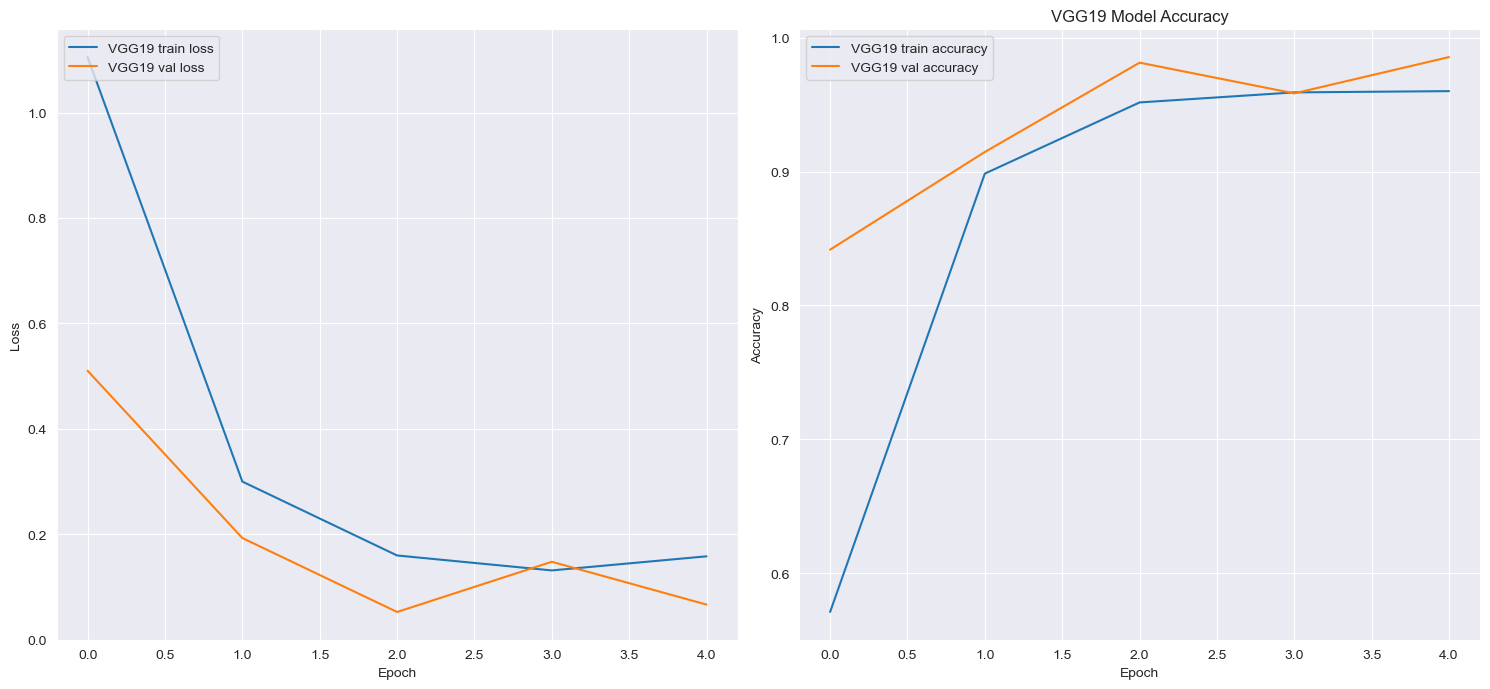

Training ResNet50 model...
Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.8595 - loss: 0.4135 - val_accuracy: 0.9875 - val_loss: 0.0434
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.9827 - loss: 0.0533 - val_accuracy: 0.8833 - val_loss: 0.7571
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.9942 - loss: 0.0260 - val_accuracy: 0.6375 - val_loss: 2.1314
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.9801 - loss: 0.0598 - val_accuracy: 0.9479 - val_loss: 0.1939
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.9914 - loss: 0.0274 - val_accuracy: 0.9187 - val_loss: 0.2413
ResNet50 model weights saved.


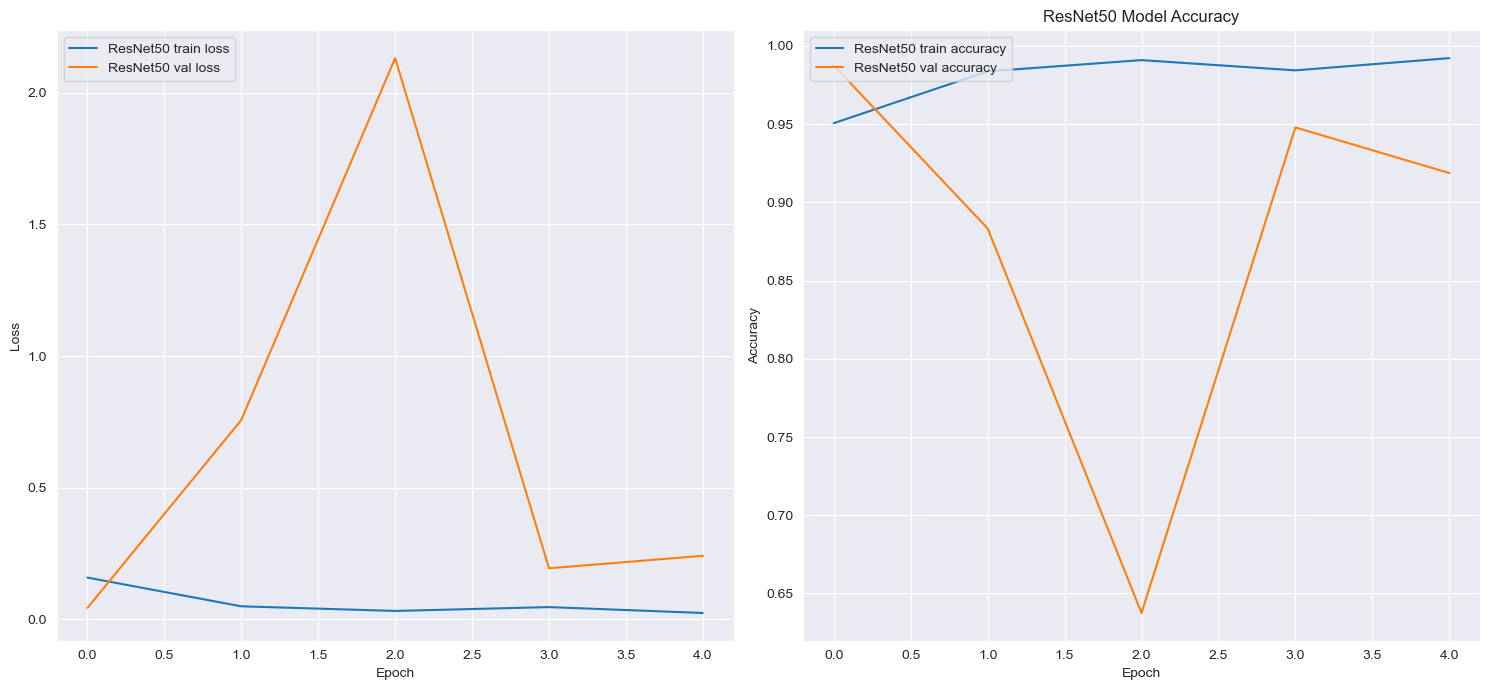

Training DenseNet121 model...
Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 536s 2s/step - accuracy: 0.8642 - loss: 0.4974 - val_accuracy: 0.9917 - val_loss: 0.0363
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 414s 2s/step - accuracy: 0.9894 - loss: 0.0291 - val_accuracy: 0.9833 - val_loss: 0.0517
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.9926 - loss: 0.0263 - val_accuracy: 0.9729 - val_loss: 0.0766
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.9930 - loss: 0.0190 - val_accuracy: 0.9917 - val_loss: 0.0228
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - accuracy: 0.9994 - loss: 0.0038 - val_accuracy: 0.9979 - val_loss: 0.0081
DenseNet121 model weights saved.


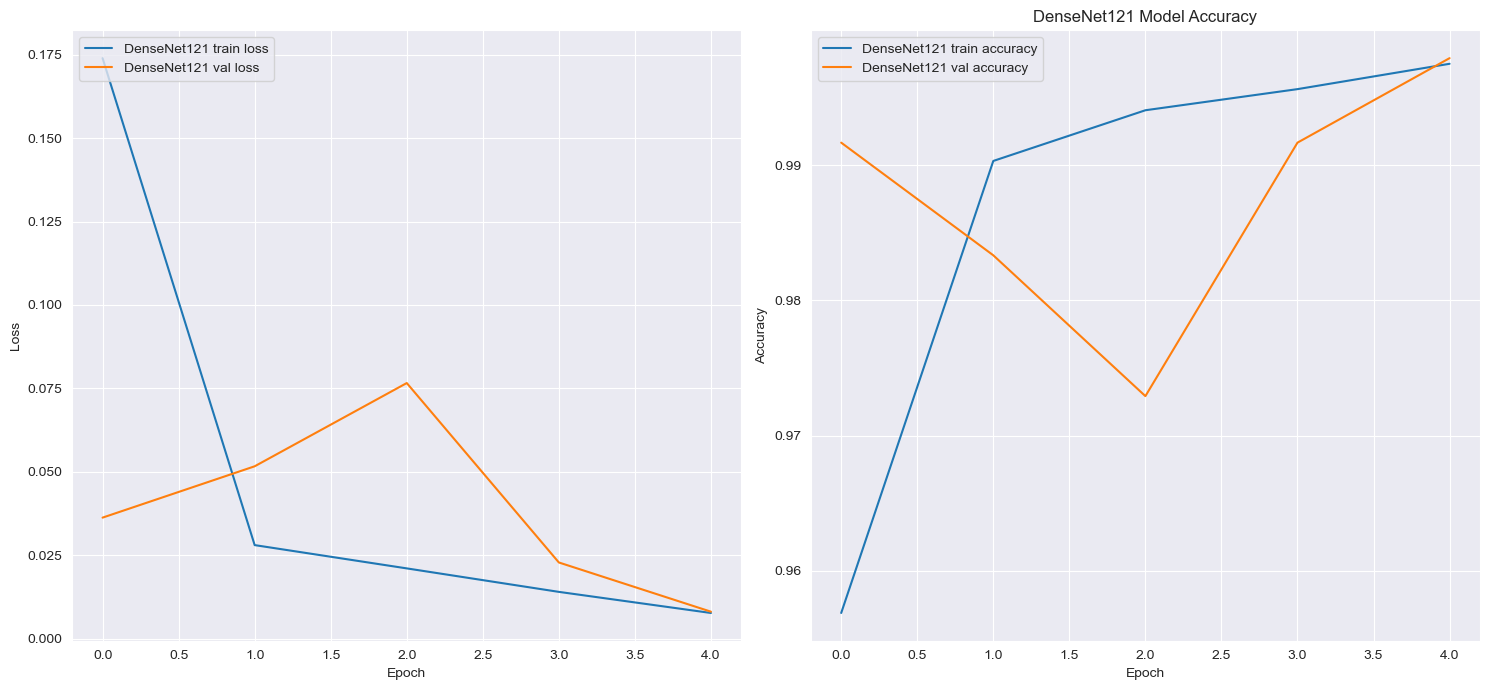

Training AlexNet model...


ValueError: Input 0 of layer "global_average_pooling2d_8" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 8)

In [ ]:
models = ['VGG16', 'VGG19', 'ResNet50', 'DenseNet121', 'AlexNet']
history_dict = {}
best_weights = {}

for model_name in models:
    print(f"Training {model_name} model...")
    model = build_model(model_name)
    model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

    history = model.fit(x = train_gen,
                        batch_size = 16,
                        epochs = 5,
                        validation_data = (valid_gen),
                        verbose = 1)

    history_dict[model_name] = history.history
    best_weights[model_name] = model
    print(f"{model_name} model weights saved.")

    fig, ax = plt.subplots(1, 2, figsize = (15,7))
    # Loss plot
    ax[0].plot(history.history['loss'], label = f"{model_name} train loss")
    ax[0].plot(history.history['val_loss'], label = f"{model_name} val loss")
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(loc='upper left')
    # Accuracy plot
    ax[1].plot(history.history['accuracy'], label=f'{model_name} train accuracy')
    ax[1].plot(history.history['val_accuracy'], label=f'{model_name} val accuracy')
    ax[1].set_title(f'{model_name} Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()

Evaluating VGG16 model on test data...
VGG16 Test Accuracy: 99.37%
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 732ms/step


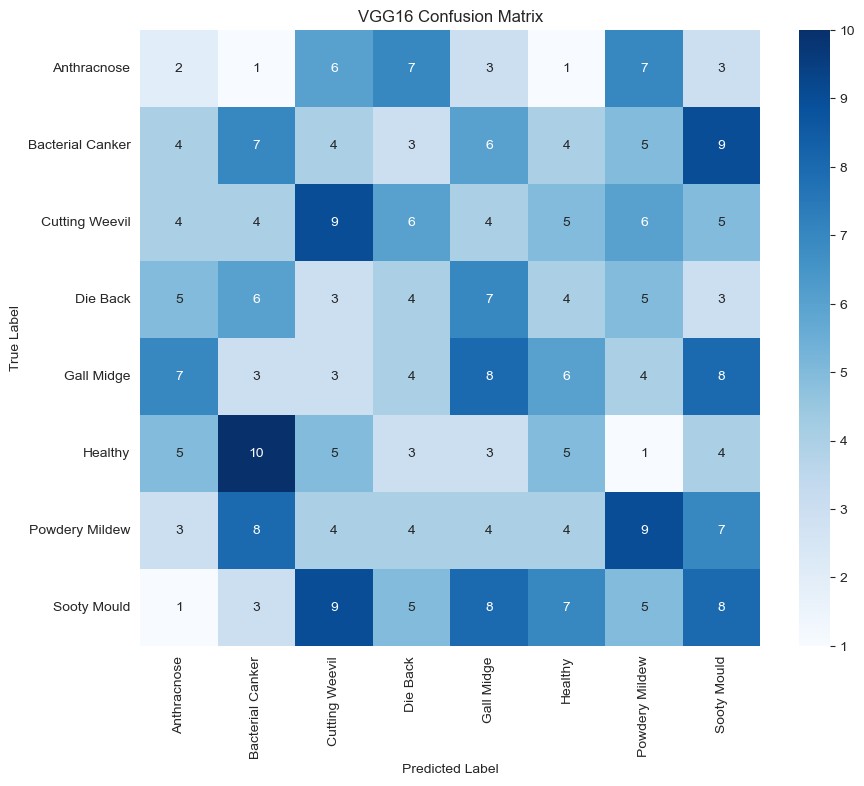

                  precision    recall  f1-score   support

     Anthracnose       0.06      0.07      0.07        30
Bacterial Canker       0.17      0.17      0.17        42
  Cutting Weevil       0.21      0.21      0.21        43
        Die Back       0.11      0.11      0.11        37
      Gall Midge       0.19      0.19      0.19        43
         Healthy       0.14      0.14      0.14        36
  Powdery Mildew       0.21      0.21      0.21        43
     Sooty Mould       0.17      0.17      0.17        46

        accuracy                           0.16       320
       macro avg       0.16      0.16      0.16       320
    weighted avg       0.16      0.16      0.16       320

Evaluating VGG19 model on test data...
VGG19 Test Accuracy: 95.94%
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 930ms/step


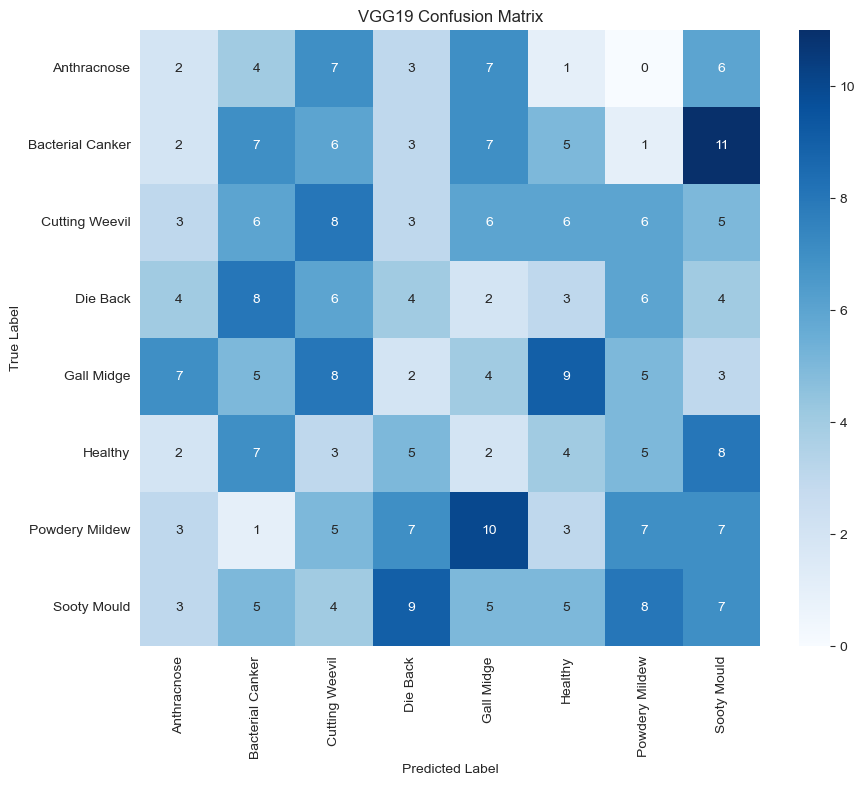

                  precision    recall  f1-score   support

     Anthracnose       0.08      0.07      0.07        30
Bacterial Canker       0.16      0.17      0.16        42
  Cutting Weevil       0.17      0.19      0.18        43
        Die Back       0.11      0.11      0.11        37
      Gall Midge       0.09      0.09      0.09        43
         Healthy       0.11      0.11      0.11        36
  Powdery Mildew       0.18      0.16      0.17        43
     Sooty Mould       0.14      0.15      0.14        46

        accuracy                           0.13       320
       macro avg       0.13      0.13      0.13       320
    weighted avg       0.13      0.13      0.13       320

Evaluating ResNet50 model on test data...
ResNet50 Test Accuracy: 93.44%
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 392ms/step


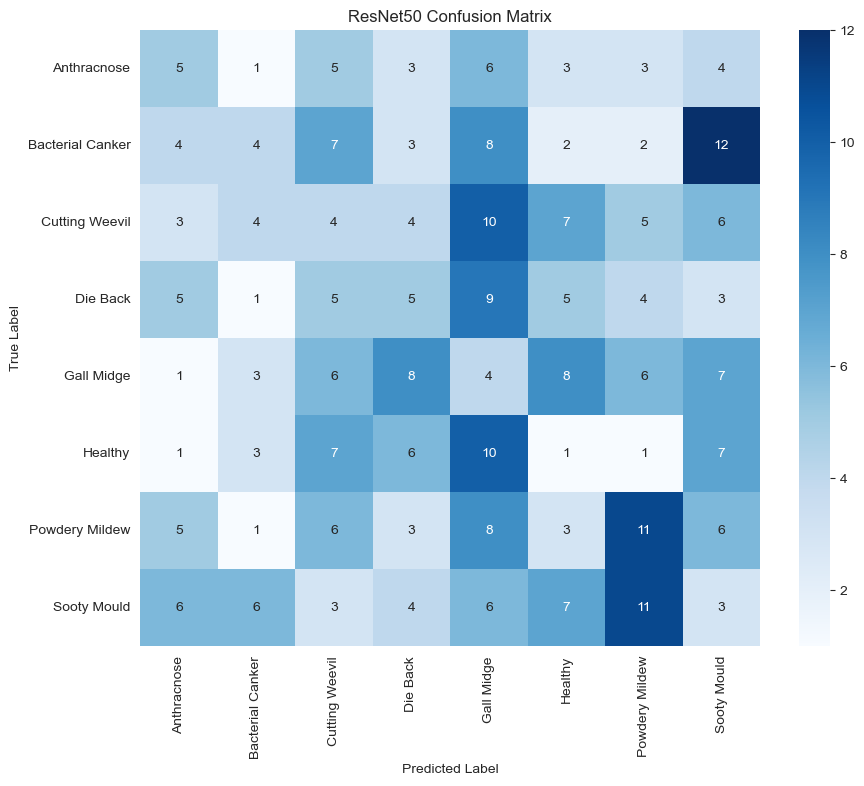

                  precision    recall  f1-score   support

     Anthracnose       0.17      0.17      0.17        30
Bacterial Canker       0.17      0.10      0.12        42
  Cutting Weevil       0.09      0.09      0.09        43
        Die Back       0.14      0.14      0.14        37
      Gall Midge       0.07      0.09      0.08        43
         Healthy       0.03      0.03      0.03        36
  Powdery Mildew       0.26      0.26      0.26        43
     Sooty Mould       0.06      0.07      0.06        46

        accuracy                           0.12       320
       macro avg       0.12      0.12      0.12       320
    weighted avg       0.12      0.12      0.12       320

Evaluating DenseNet121 model on test data...
DenseNet121 Test Accuracy: 99.37%
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 476ms/step


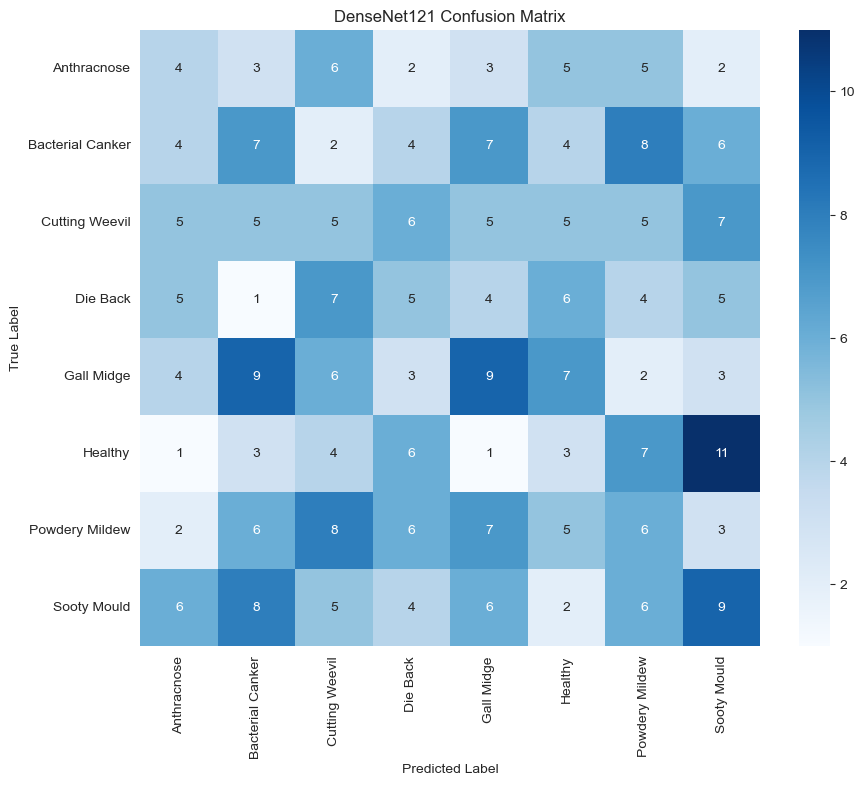

                  precision    recall  f1-score   support

     Anthracnose       0.13      0.13      0.13        30
Bacterial Canker       0.17      0.17      0.17        42
  Cutting Weevil       0.12      0.12      0.12        43
        Die Back       0.14      0.14      0.14        37
      Gall Midge       0.21      0.21      0.21        43
         Healthy       0.08      0.08      0.08        36
  Powdery Mildew       0.14      0.14      0.14        43
     Sooty Mould       0.20      0.20      0.20        46

        accuracy                           0.15       320
       macro avg       0.15      0.15      0.15       320
    weighted avg       0.15      0.15      0.15       320



In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

models = ['VGG16', 'VGG19', 'ResNet50', 'DenseNet121']
for model_name in models:
    print(f"Evaluating {model_name} model on test data...")
    model = best_weights[model_name]

    scores = model.evaluate(x=test_gen, verbose=0)
    print(f"{model_name} Test Accuracy: {scores[1] * 100:.2f}%")

    y_pred = np.argmax(model.predict(test_gen), axis=1)
    
    cm = confusion_matrix(test_gen.classes, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    print(classification_report(test_gen.classes, y_pred, target_names=classes))

In [33]:
import os

# Define a directory to save the models
model_save_dir = 'D:\Project\Mango leave disease detection'
os.makedirs(model_save_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Save each trained model
for model_name, model in best_weights.items():
    model_file_path = os.path.join(model_save_dir, f"{model_name}_model.h5")  # Save as HDF5 format
    model.save(model_file_path)
    print(f"{model_name} model saved at {model_file_path}.")

VGG16 model saved at D:\Project\Mango leave disease detection\VGG16_model.h5.


VGG19 model saved at D:\Project\Mango leave disease detection\VGG19_model.h5.


ResNet50 model saved at D:\Project\Mango leave disease detection\ResNet50_model.h5.
DenseNet121 model saved at D:\Project\Mango leave disease detection\DenseNet121_model.h5.


In [35]:
import os

# Define a directory to save the models
model_save_dir = 'D:\Project\Mango leave disease detection'
os.makedirs(model_save_dir, exist_ok=True)  # Create the directory if it doesn't exist

# Save each trained model
for model_name, model in best_weights.items():
    model_file_path = os.path.join(model_save_dir, f"{model_name}_model.keras")  # Save as HDF5 format
    model.save(model_file_path)
    print(f"{model_name} model saved at {model_file_path}.")

VGG16 model saved at D:\Project\Mango leave disease detection\VGG16_model.keras.
VGG19 model saved at D:\Project\Mango leave disease detection\VGG19_model.keras.
ResNet50 model saved at D:\Project\Mango leave disease detection\ResNet50_model.keras.
DenseNet121 model saved at D:\Project\Mango leave disease detection\DenseNet121_model.keras.
